In [6]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 39.0 MB/s 
     |████████████████████████████████| 6.3 MB 39.9 MB/s 


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
!ls /content/gdrive/MyDrive/campo/Reference/CampoVerde_Oct2015_Jul2016.shp

CampoVerde_Oct2015_Jul2016.cpg	CampoVerde_Oct2015_Jul2016.prj
CampoVerde_Oct2015_Jul2016.dbf	CampoVerde_Oct2015_Jul2016.qtr
CampoVerde_Oct2015_Jul2016.ebb	CampoVerde_Oct2015_Jul2016.shp
CampoVerde_Oct2015_Jul2016.ed1	CampoVerde_Oct2015_Jul2016.shx
CampoVerde_Oct2015_Jul2016.eq1


In [16]:
import geopandas as gpd
import pandas as pd
df = gpd.read_file('/content/gdrive/MyDrive/campo/Reference/CampoVerde_Oct2015_Jul2016.shp')
df.head()

,Id,Field_numb,Area,Oct_2015,Nov_2015,Dec_2015,Jan_2016,Feb_2016,Mar_2016,Apr_2016,May_2016,Jun_2016,Jul_2016,geometry
0,0,0.0,23,Uncultivated Soil,Uncultivated Soil,Soybean,Soybean,Uncultivated Soil,Cotton,Cotton,Cotton,Cotton,Cotton,"POLYGON ((693318.133 8299706.779, 693641.029 8..."
1,0,1.0,418,Uncultivated Soil,Soybean,Soybean,Uncultivated Soil,Uncultivated Soil,Cotton,Cotton,Cotton,Cotton,Cotton,"POLYGON ((694457.384 8300546.989, 694529.351 8..."
2,0,2.0,90,Uncultivated Soil,Uncultivated Soil,Soybean,Soybean,Soybean,Uncultivated Soil,Maize,Maize,Maize,Uncultivated Soil,"POLYGON ((695201.838 8302660.731, 695343.931 8..."
3,0,3.0,213,Uncultivated Soil,Soybean,Soybean,Uncultivated Soil,Uncultivated Soil,Cotton,Cotton,Cotton,Cotton,Cotton,"POLYGON ((693189.605 8298719.362, 693276.698 8..."
4,0,4.0,267,Uncultivated Soil,Soybean,Soybean,Uncultivated Soil,Uncultivated Soil,Cotton,Cotton,Cotton,Cotton,Cotton,"POLYGON ((693162.814 8298666.245, 693191.845 8..."


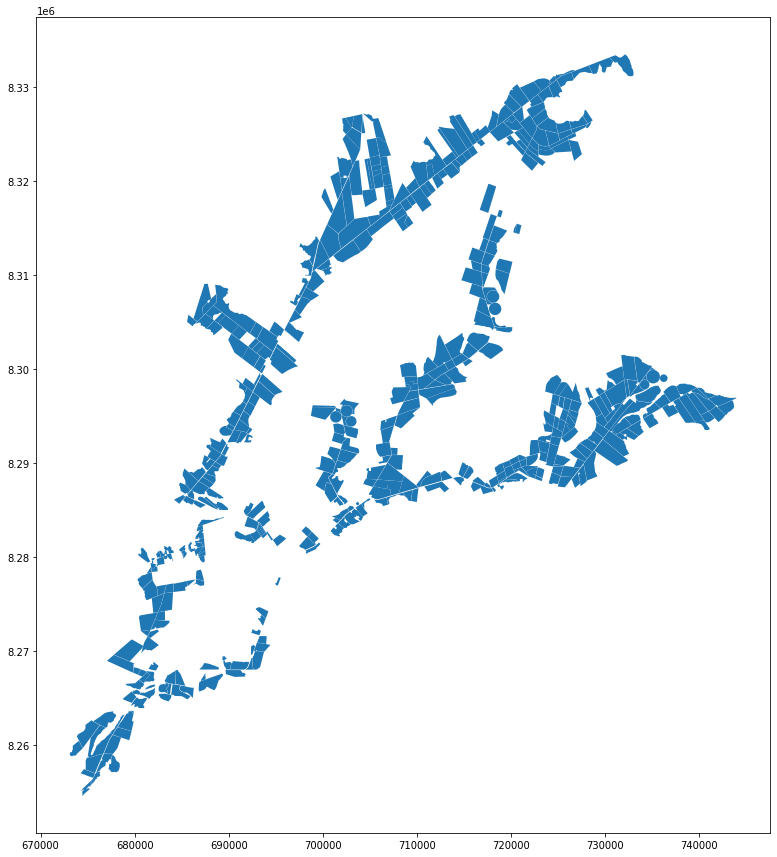

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
df.plot(ax=ax)

In [19]:
!pip install geehydro

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for geehydro: filename=geehydro-0.2.0-py2.py3-none-any.whl size=10143 sha256=58ffd52d24a0288ce38a756177ea877572aa95a4adda4a56139c6daa011b45cf
  Stored in directory: /root/.cache/pip/wheels/49/6c/92/019aeb37663078e6666afa9dd336e2d8df72d5683d7d357697
Successfully built geehydro


In [ ]:
#Initializing Google Earth Engine
import ee
import geehydro
ee.Authenticate()
ee.Initialize()

#Defining the area of interest from the parcel's bounding box
envelope = df.geometry.total_bounds
aoi=ee.Geometry.Rectangle(envelope.tolist())

#Accessing the latest collection (6) and filter to the year of 2020 and area of interest
Mapbiomas = ee.Image('projects/mapbiomas-workspace/public/collection6/mapbiomas_collection60_integration_v1').select('classification_2020').clip(aoi)

#Having a look to see that we have the right image
from IPython.display import Image
parameters = {'min': 0,
              'max': 33,
              'dimensions': 512,
              'region': aoi}

Image(url = Mapbiomas.getThumbUrl(parameters))

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=fFj9G6ahNh7m_l2TOjIb_5b3prkioMrehhMiWIQ2VC0&tc=NUcnqyo7HcrPviQ1hQYtFWhe09jwiCMh0rBQoWyXQ74&cc=opcQPJP-qcvWenYm-pX2dcv7MzznDpFZ9KHQ5ZdKSpI

The authorization workflow will generate a code, which you should paste in the box below. 
